#Вводная информация

##Задача

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.

##Описание датасета

Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

##Рекомендации по выполнению проекта

1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.

3. Оцените количество уникальных значений для номинативных переменных.

4. По необходимости преобразуйте данные

5. Проведите корреляционный анализ количественных переменных.

6. Отберите не коррелирующие переменные.

7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).

8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

#Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# увеличим количество вывдоа строк и колонок
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# загрузим датасет
stud = pd.read_csv('/content/drive/MyDrive/Data Science Course/Unit 2/Unit 2 project/stud_math.csv')

In [ ]:
# первый взгляд на датасет
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


#Первичный осмотр

In [ ]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [ ]:
# какие данные содержатся в столбце, пропущенном в описании?
stud['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

In [ ]:
# сравним столбец 'studytime, granular' со столбцом 'studytime', имеющим схожее название
display(pd.DataFrame(stud['studytime'].value_counts()), pd.DataFrame(stud['studytime, granular'].value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


**Результат первичного осмотра данных:**

В таблице всего 395 записей с 30 признаками. Тип данных (dtype) для каждого столбца разный, с преобладанием объект над целыми числами и числами с плавающей запятой. Многие признаки содержат пропуски. Пропуски заполнены NaN ("не число"), что может вызвать проблемы с обработкой строк без предварительного заполнения пропусков.

Среди признаков: численных - три (age, absences, score);

бинарных - тринадцать (school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic);

оценочных, имеющих по несколько фиксированных значений, - четырнадцать (Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, studytime_granular, famrel, freetime, goout, health).

Столбец studytime, granular отсутствует в описании и содержит отрицательные числовые данные. Кроме того, очевидна полная корреляция этого признака со столбцом studytime, имеющимся в описании датасета.

Среди прочих признаков, согласно здравого смысла, нет явно не соответствующих критерию оказанию влияния на целевой признак.

**Целевым признаком** является score и он - численный.

In [ ]:
target_name = 'score'

#Функции для анализа данных

In [ ]:
def allocation(df_col):
    '''
    Анализ отдельного признака датасета на его содержание и количество пропусков.
    df_col - название столбца датасета. 
    '''
    
    ttl = len(pd.DataFrame(stud[df_col].value_counts()))
    gap = int(pd.DataFrame(stud[df_col]).isna().sum())
    return display(pd.DataFrame(stud[df_col].describe()).T),\
display(pd.DataFrame(stud[df_col].value_counts().sort_index())),\
print("В столбце '{}' имеется уникальных значений: {}, количество пропусков: {}.".format(df_col, ttl, gap))

In [ ]:
def outliers(df_col):
    '''
    Определение наличия выбросов в отдельном признаке датасета.
    Расчёт данных описательной статистики. Определение границ выбросов.
    Подсчёт общего количества выбросов в признаке.
    df_col - название столбца датасета. 
    '''
    
    q1 = stud[df_col].quantile(0.25)
    q3 = stud[df_col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    for i in stud[df_col]:
        if (i <= low) or (i >= high):
            print("В столбце есть значения, которые могут считаться выбросами")
            break
    
    print("25-й процентиль: {}, 75-й процентиль: {}, IQR: {}, Границы выбросов: [{}, {}]".format(q1, q3, iqr, low, high))
    
    print("Количество выбросов в признаке '{}': {}."
          .format(df_col, ((stud[df_col] < (q1 - 1.5 * iqr)) | (stud[df_col] > (q3 + 1.5 * iqr))).sum()))

In [ ]:
def remove_outliers(df_col):
    '''
    Удаление найденных выбросов в отдельном признаке датасета.
    Данную функцию можно применять, если выбросы нет возможности изменить
    с использование расчётных мер описательной статистики.
    
    df_col - название столбца датасета. 
    
    '''
    
    q1 = stud[df_col].quantile(0.25)
    q3 = stud[df_col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    out_df = stud.loc[(stud[df_col] > low) & (stud[df_col] < high)]
    return out_df

In [ ]:
def get_boxplot(df_col):
    '''
    Функция выводит boxplot распределения анализируемого признака.
    
    df_col - название столбца датасета. 
    
    '''
    
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=df_col, y='score', data=stud, fliersize=8, ax=ax)
    ax.set_title(df_col, fontsize=22)
    plt.show()

In [ ]:
def fill_mode(df_col):
    '''
    Функция заполняет пропуски анализируемого признака
    значением, которое встречается наиболее часто.
    
    df_col - название столбца датасета. 
    
    '''
    
    stud[df_col].fillna(stud[df_col].mode()[0], inplace=True)

In [ ]:
def numerical_features(item_name, target_name=target_name, n_bins=100):
    '''
    Функция для анализа численных признаков.
    
    Рисует несколько графиков:
    - боксплот `sns.boxplot()`: удобно выявлять аномалии
    - распределение `sns.histplot()`
    - диаграмму рассеяния `sns.scatterplot()`: можно выявить зависимости
    Вычисляет базовые статистические показатели `.describe()` 
    Определяет количество пропущенных значений.
    
    item_name - название оценочного категориального признака датасета.
    
    Функция требует предварительного определения target_name (целевой признак) 
    до вызова или допускает ввод его названия в аргументе для корректной работы.
        
    '''
    
    if item_name != target_name:
        fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
    # boxplot    
    stud.boxplot(column=item_name, ax=axes[0])
    axes[0].set_title(item_name, fontsize=22)
    
    # displot
    ##sns.distplot(stud[item_name], bins=n_bins, kde=True, ax=axes[1], vertical=True)
    sns.histplot(data=stud, y=item_name, kde=True, ax=axes[1], bins=n_bins)
    axes[1].set_title(item_name, fontsize=22)
    plt.xticks(rotation=45)
        
    # scatterplot
    if item_name != target_name:
        axes[2] = sns.scatterplot(x=item_name, y=target_name, data=stud)
       
    # descriptive statistics
    print(pd.DataFrame(stud[item_name].describe()).T, "\n")
    print("В столбце '{}' имеется {} пропусков.".format(item_name, stud[item_name].isna().sum()), '\n'*2)

In [ ]:
def ordinal_features(item_name):
    '''
    Функция для анализа упорядоченных категориальных (ordinal) признаков.
    
    Рисует несколько графиков:
    - `sns.barplot()`: фактическое распределение, удобно выявлять дисбаланс классов
    - `sns.boxplot()` для каждого класса: удобно выявлять аномалии внутри классов
    - `sns.kdeplot()` для каждого класса: удобно сравнивать классы 
    Выводит количество значений признака для каждого класса: удобно выявлять аномалии. 
    Определяет количество пропущенных значений.
    
    item_name - название оценочного категориального признака датасета.
    
    Функция требует предварительного определения target_name (целевой признак) для корректной работы.
        
    '''
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    
    # barplot
    bar_data = stud.groupby(item_name)[item_name].count()
    br_plot = sns.barplot(x=bar_data.index, y=bar_data, ax = axes[0])
    br_plot.set_xticklabels(bar_data.index, rotation=45)
    axes[0].set_title(item_name, fontsize=22)
    
    # boxplots for classes
    bx_plot = sns.boxplot(x=item_name, y=target_name, data=stud, ax=axes[1])    
    bx_plot.set_xticklabels(bar_data.index, rotation=45)
    plt.xticks(rotation=45)
    axes[1].set_title(item_name, fontsize=22)
        
    # kdeplots for classes
    values = stud[item_name].value_counts()
    for value in values.index:
        sns.kdeplot(y=stud[stud[item_name] == value][target_name], ax=axes[2], label=value)    
    axes[2].set_title(item_name, fontsize=22)
    axes[2].legend(fontsize=22)
        
    # descriptive statistics
    print(bar_data, "\n")
    print("В столбце '{}' имеется {} пропусков.".format(item_name, stud[item_name].isna().sum()), '\n'*2)

In [ ]:
def corr_coeff(item_name, target_name=target_name):
    '''
    Определение коэффициента корреляции Пирсона
    между двумя численными признаками датасета.
    
    item_name - название анализируемого столбца датасета. 
    target_name - название целевого столбца датасета. 
    
    Функция требует предварительного определения target_name (целевой признак) 
    до вызова или допускает ввод его названия в аргументе для корректной работы.
    
    '''
    
    corr_coeff = np.array(stud[[item_name, target_name]].corr())[0, 1]
    print("Коэффициент корреляции Пирсона между признаками '{}' и '{}' составляет {:.4f}."
          .format(item_name, target_name, corr_coeff))

In [ ]:
def get_stat_dif(df_col):
    '''
    Функция для определения признаков со статистически значимыми отклонениями.
    Представляет собой теста Стьюдента на гипотезу о нулевой разнице параметров 
    распределений итоговой оценки (score) по парам значений из категориальных или 
    порядковых столбцов на уровне доверия 90 % с учетом поправки Бонферрони.
    (Функция полностью скопирована из курса SkillFactory с изменением целевого признака
    и доверительного интервала из-за небольшого размера выборки.)
    
    df_col - название столбца датасета. 
    important_for_model - внешний список, собирающий значимые признаки.
    
    '''
    
    cols = stud.loc[:, df_col].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, df_col] == comb[0], 'score'], 
                     stud.loc[stud.loc[:, df_col] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):                                    # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', df_col)
            important_for_model.append(df_col)
            break

#Предобработка датасета

## Переименование, удаление, замена

In [ ]:
# переименуем для удобства все столбцы, убрав заглавные буквы
stud.rename(str.lower, axis='columns', inplace=True)

# удаляем столбец 'studytime, granular', т.к. он неинформативен
stud.drop(['studytime, granular'], inplace=True, axis=1)

# для удобства анализа заменим значения значения "Yes" и "No" на 0 и 1 соответственно 
stud = stud.replace({'yes': 0.0, 'no': 1.0})

# приводим к стандарту PEP-8 названия всех столбцов
stud.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 'father_edu',
                'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 
                'school_support', 'family_support', 'paid', 'activities', 'nursery', 'higher', 'internet',
                'romantic', 'family_relations', 'free_time', 'go_out', 'health', 'absences', 'score'
                ]

stud.head(3)

,school,sex,age,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0



Проверим наличие пропусков в целевом признаке (score).
Так как в целевом признаке нам нужна только достоверная информация, стратегия последующих действий будет - найти пропуски и удалить.

In [ ]:
print("Целевой признак имеет {} пропущенных значений.".format(stud['score'].isna().sum()))

Целевой признак имеет 6 пропущенных значений.


Доля пропусков в целевом признаке всего около 1.5%, поэтому предварительная стратегия не меняется.

In [ ]:
# удалим строки, имеющие пропуск значений в целевом признаке
stud.dropna(subset=['score'], inplace=True)
print("Dataset has {} entries after dropping NA.".format(len(stud)))

Dataset has 389 entries after dropping NA.


In [ ]:
# проверим наличие дубликатов строк
print("Dataset has {} duplicated entries.".format(stud.duplicated().sum()))

Dataset has 0 duplicated entries.


In [ ]:
# проверка признаков датасета на неинформативность
num_rows = len(stud.index)
low_information_cols = [] # список признаковб у которых более 95% строк содержат одно и то же значение

for col in stud.columns:
  cnts = stud[col].value_counts(dropna=False)
  top_pct = (cnts/num_rows).iloc[0]
  if top_pct > 0.95:
    low_information_cols.append(col)
    print('{0}: {1:.5f}%'.format(col, top_pct*100))
    print(cnts)
    print()

if len(low_information_cols) == 0:
  print("Dataset has no low informativeness signs")

Dataset has no low informativeness signs


In [ ]:
# проверим наличие пропусков в остальных признаках
stud.isna().sum()

school               0
sex                  0
age                  0
address             15
family_size         27
parents_status      45
mother_edu           3
father_edu          24
mother_job          19
father_job          36
reason              17
guardian            31
travel_time         28
study_time           7
failures            22
school_support       9
family_support      38
paid                39
activities          14
nursery             15
higher              20
internet            34
romantic            31
family_relations    27
free_time            9
go_out               7
health              15
absences            11
score                0
dtype: int64

In [ ]:
print("Max proportion of missing values is {:.1%} in '{}'.".format(stud.isna().sum().max()/len(stud), stud.isna().sum().idxmax()))

Max proportion of missing values is 11.6% in 'parents_status'.


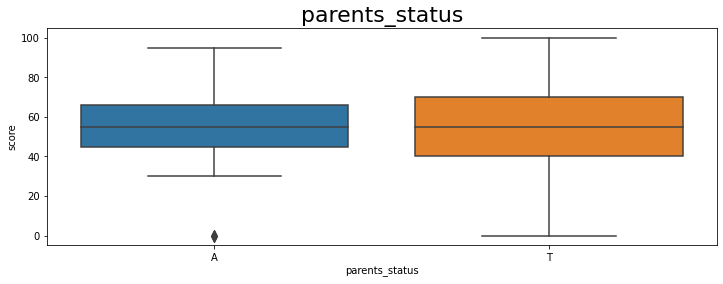

In [ ]:
# проверка влияния признака на целевой по классам
get_boxplot(stud.isna().sum().idxmax())

Хотя доля пропущенных значений в признаках датасета в целом относительно невелика (в границах 5-10 %%), общее количество признаков избыточно для будущей модели. Мне не удалось найти среди имеющихся признаков неинформативные, чтобы удалить их. Признак, имеющий максимальную долю пропусков, согласно здравому смыслу, не имеет очевидной прямой взаимосвязи с другими признаками. Проверка его влияния по классам на целевой признак также не показывает существенного влияния. Поэтому, в целях сокращения объёма данных, к уже удалённому ранее studytime, granular я решил добавить лидера по числу пропусков parents_status.

In [ ]:
stud.drop(['parents_status'], inplace=True, axis=1)

In [ ]:
# повторно получим краткую информацтю о датасете
stud.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Columns: 28 entries, school to score
dtypes: float64(19), int64(1), object(8)
memory usage: 98.1+ KB


##Проверка численных признаков на взаимную корреляцию

,score,age,absences
score,1.000000,-0.155726,0.065283
age,-0.155726,1.000000,0.096628
absences,0.065283,0.096628,1.000000


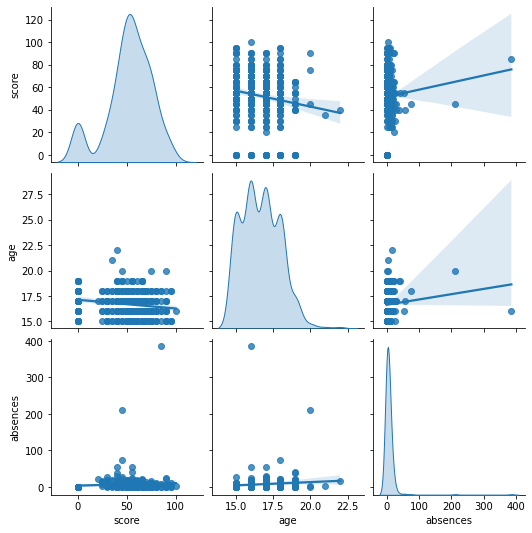

In [ ]:
# задание списка столбцов с количественными данными
ft_numerical = ['score', 'age', 'absences']

df_fn = stud[ft_numerical]
sns.pairplot(df_fn, kind = 'reg', diag_kind='kde', palette='flag')
df_fn.corr()

Как видно, корреляция числовых признаков незначительная, однако убрать их из дальнейшего анализа сейчас пока невозможно, т.к. в признаках есть выбросы, которые могут оказывать сильное влияние на корреляцию. 

Помимо чистых числовых признаков score, absences и age были взяты признаки, числовые значения в которых сгруппированы в бакеты. Хотя группировка в бакеты несколько искажает коэффициенты корреляции, общая направленность сохраняется, и можно попробовать увидеть некоторые зависимости.

Среди представленных малых корреляций уже можно выделить следющие коэффициенты:
1. **score** и **age**, **study_time**, **go_out** - успеваемость в большей степени зависит от возраста, времени на учебу и времени на друзей;
2. **age** и **absences**, **go_out** - посещаемость старшекурсников несколько отличается от посещаемости первокуров;
3. **travel_time** и **study_time** - чем дольше дорога тем меньше времени на учебу;
4. **study_time** и **free_time** - выделяющаяся на общем фоне обратная корреляция;
5. **family_relations** и **free_time** - выделяющаяся прямая зависимость;
6. **free_time** и **go_out** - наибольший коэффициент прямой корреляции в таблице.

**Вывод**: Успеваемость в некоторой степени ухудшается с возрастом вследствие смещения предпочтений с учебы на общение с друзьями, что может являться признаком психологического выгорания. Поскольку есть прямая зависимость go_out - free_time - family_relations, первым шагом можно порекомендовать работу психологов с родителями учеников, и последующую работу между родителями и учениками при дистанционной поддержке психологов. Акцент необходимо сделать на живущих удаленно от учебного заведения. 

Проверим эту гипотезу при дальнейшем анализе.

##Группировка категориальных признаков


Представляется удобным провести группировку схожих признаков датасета для применения к их последующему анализу одинаковых подходов, которые можно обернуть созданными для этого функциями.

In [ ]:
# создание списков с названиями столбцов, имеющих одинаковую структуру данных
ft_list_all = stud.columns.values

print("Dataset has {} analysis attributes.".format(len(ft_list_all)))

ft_categorical = [x for x in ft_list_all if not x in ft_numerical]

is_no_repeat = len(ft_categorical) == len(set(ft_categorical))
print("Categorical list has", "no" if is_no_repeat else "", "repeating elements.")

ft_binary = [x for x in ft_categorical if stud[x].nunique()<=2]
ft_ordinal = [x for x in ft_categorical if stud[x].nunique()>2]

print("Dataset has {} categorical attributes, incl.:\n  {} binary attributes,\n  {} ordinal attributes.".format(len(ft_categorical), len(ft_binary), len(ft_ordinal)))

Dataset has 28 analysis attributes.
Categorical list has no repeating elements.
Dataset has 25 categorical attributes, incl.:
  12 binary attributes,
  13 ordinal attributes.


## Применяемые методы для анализа признаков разного вида


У численных признаков возможно вычисление различныч статистик, т.к. среднее, дисперсия и стандатное отклонение нуждаются в вещественной шкале. Также будут вычислены процентили и линейный коэффициент корреляции Пирсона для пары признак/цель.

У оценочных категориальных признаков можно определить моду и медиану в качестве статистики центральной тенденции и квантили в качестве статистик разброса. Также для них можно определить выбросы для принятия решения о их последующей судьбе (оставить/изменить/убрать) в сете.

В столбцах с бинарными категориальными признаками не может быть никакой сводной статистики кроме моды.

Во всех столбцах, имеющих пропуски, необходимо принимать решение об их заполнении для возможности последующего использования признаков в модели, т.к. строки с NaN не всегда поддаются обработке.

#Анализ всех признаков датасета


In [ ]:
#@title ## **Choose an attribute to describe:** { run: "auto", display-mode: "form" }
attribute_name = "score" #@param ["school", "sex", "age", "address", "family_size", "mother_edu", "father_edu", "mother_job", "father_job", "reason", "guardian", "travel_time", "study_time", "failures", "school_support", "family_support", "paid", "activities", "nursery", "higher", "internet", "romantic", "family_relations", "free_time", "go_out", "health", "absences", "score"]
allocation(attribute_name)

,count,mean,std,min,25%,50%,75%,max
score,389.0,52.262211,22.919022,0.0,40.0,55.0,70.0,100.0


,score
0.0,37
20.0,1
25.0,7
30.0,15
35.0,9
40.0,31
45.0,27
50.0,54
55.0,46
60.0,31


В столбце 'score' имеется уникальных значений: 18, количество пропусков: 0.


(None, None, None)

##Численные признаки

### Общий  анализ

Начнём анализ с признаков, имеющих некое количественное распределение выборки. Здравый смысл (и проведенная ранее оценка их корреляции) подсказывает, что должна существовать некая зависимость с целевым признаком.

       count       mean        std   min   25%   50%   75%    max
score  344.0  57.863372  16.135774  20.0  50.0  55.0  70.0  100.0 

В столбце 'score' имеется 0 пропусков. 


     count       mean       std   min   25%   50%   75%   max
age  344.0  16.572674  1.168317  15.0  16.0  17.0  17.0  19.0 

В столбце 'age' имеется 0 пропусков. 


          count      mean       std  min  25%  50%  75%   max
absences  344.0  5.930233  6.587453  0.0  2.0  4.0  8.0  40.0 

В столбце 'absences' имеется 0 пропусков. 




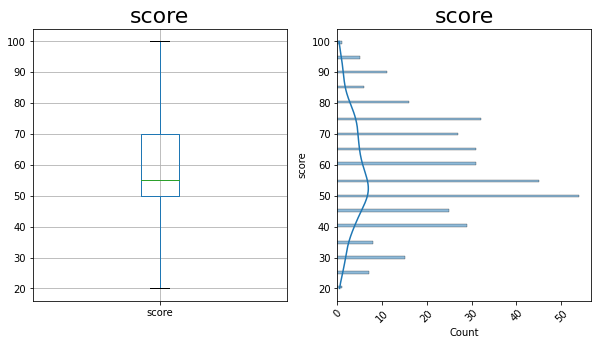

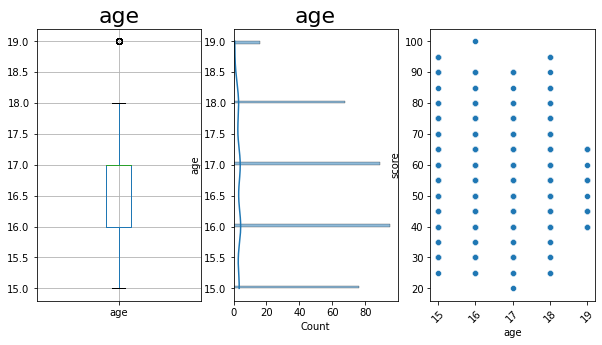

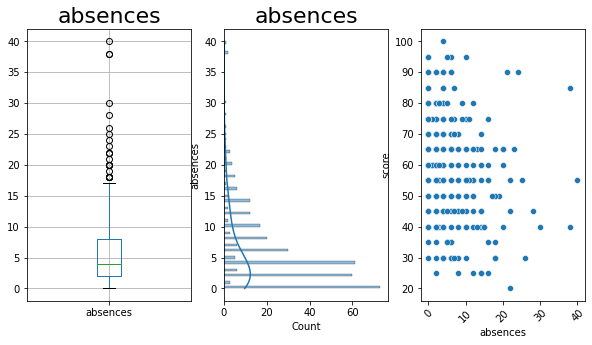

In [ ]:
##ft_numerical = ['age', 'absences', 'score']

for col in ft_numerical:
  numerical_features(col)

### Признак age

Age - количественный признак, не имеющий пропусков.
Анализируя показатели описательной статистики и гистрограмму распределения, можно предположить, что в столбце есть возможный выброс. Проведём дополнительное исследование:

In [ ]:
allocation('age')

,count,mean,std,min,25%,50%,75%,max
age,389.0,16.673522,1.265662,15.0,16.0,17.0,18.0,22.0


,age
15,82
16,103
17,98
18,80
19,21
20,3
21,1
22,1


В столбце 'age' имеется уникальных значений: 8, количество пропусков: 0.


(None, None, None)

In [ ]:
outliers('age')

В столбце есть значения, которые могут считаться выбросами
25-й процентиль: 16.0, 75-й процентиль: 18.0, IQR: 2.0, Границы выбросов: [13.0, 21.0]
Количество выбросов в признаке 'age': 1.


In [ ]:
display(pd.DataFrame(stud.groupby(['age']).score.agg(['count', 'mean', 'max', 'min', 'median'])))

,count,mean,max,min,median
age,,,,,
15,82,56.280488,95.0,0.0,55.0
16,103,55.194175,100.0,0.0,55.0
17,98,51.377551,90.0,0.0,55.0
18,80,48.312500,95.0,0.0,50.0
19,21,40.238095,65.0,0.0,45.0
20,3,70.000000,90.0,45.0,75.0
21,1,35.000000,35.0,35.0,35.0
22,1,40.000000,40.0,40.0,40.0


Статистический анализ признака age показывает, что возраст в 22 года может считаться выбросом.
Однако, описательная часть датасета однозначно указывает, что возраст учеников находится в пределах от 15 до 22 лет.
Оценивая связь между возрастом и итоговой оценкой, можно увидеть, что распределение признака age асимметричное, положительно смещённое, большинство учеников в возрасте 16-17 лет. Очевидна общая тенденция снижения успеваемости с ростом возраста ученика, хотя коэффициент корреляции невелик. При этом, данных по ученикам старше 19 лет слишком мало, чтобы можно было сделать какие-либо выводы об их попадании в группу риска. В любом случае, оценка причин попадания в датасет учеников с большим возрастом, выходит за рамки задания. В связи с вышеизложенным, для качественной работы будущей модели, я принимаю решение ограничить верхний предел возраста ученика 19 годами и удалить всех старше этого предела.

In [ ]:
stud = stud.loc[~stud['age'].isin([20, 21, 22])]

In [ ]:
corr_coeff('age', 'score')

Коэффициент корреляции Пирсона между признаками 'age' и 'score' составляет -0.1717.


Коэффициент корреляции увеличился по сравнению с предварительной оценкой, но по-прежнему остался небольшим.

Интерсна взаимосвязь возраста учеников с результами аттестации с учётом школы и пола экзаменуемых:

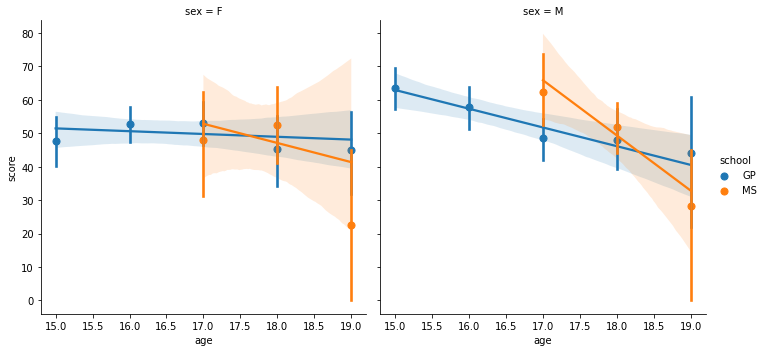

In [ ]:
sns.lmplot(x="age", y="score", hue="school", col="sex", data=stud, x_estimator=np.mean)

### Признак absences

Absences количественный признак, имеющий большое количество пропусков и выбросов. Среди выбросов есть уникальный 385, который, возможно, является ошибкой ввода и, очевидно, меняет всю картину по этому признаку. Работа с этим представляется крайне важной.

Проведём дополнительное исследование:

In [ ]:
outliers('absences')

В столбце есть значения, которые могут считаться выбросами
25-й процентиль: 0.0, 75-й процентиль: 8.0, IQR: 8.0, Границы выбросов: [-12.0, 20.0]
Количество выбросов в признаке 'absences': 16.


count    373.000000
mean       6.788204
std       21.257021
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

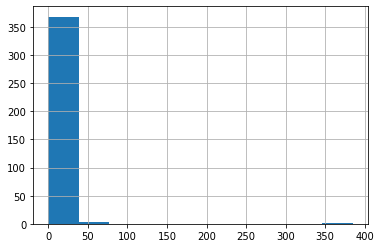

In [ ]:
stud['absences'].hist()
stud['absences'].describe()

In [ ]:
allocation('absences')

,count,mean,std,min,25%,50%,75%,max
absences,373.0,6.788204,21.257021,0.0,0.0,4.0,8.0,385.0


,absences
0.0,109
1.0,3
2.0,60
3.0,6
4.0,51
5.0,5
6.0,30
7.0,6
8.0,20
9.0,3


В столбце 'absences' имеется уникальных значений: 35, количество пропусков: 11.


(None, None, None)

In [ ]:
#@title Enter the right value to replace "385"
right_value =  38#@param {type:"number"}
# скорректируем выброс, который вероятно является ошибкой ввода
stud['absences'].replace(385, right_value, inplace=True)

In [ ]:
# заполним пропуски значениями медианы
stud['absences'].fillna(stud['absences'].median(), axis=0, inplace=True)

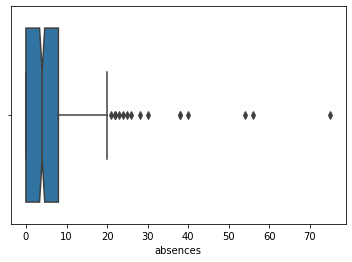

In [ ]:
# смотрим
sns.boxplot(x='absences', data=stud, fliersize=5, notch=True)

In [ ]:
# посмотрим на выборку учеников с большим количеством пропусков
stud[stud.absences > 40].sort_values('absences')

,school,sex,age,address,family_size,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
74,GP,F,16,U,GT3,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,3.0,1.0,56.0,40.0
276,GP,F,18,R,GT3,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0,5.0,75.0,45.0


Распределение признака имеет длинный хвост справа, хотя при значениях ниже 40 пропусков очень плотное. В этой связи принимаю решение убрать из выборки всех учеников, имеющих непропорционально большое количество пропусков и средние результаты.

In [ ]:
# удаление из выборки записей с количеством пропусков более 40
stud=stud.loc[(stud['absences'] <=40)]

In [ ]:
corr_coeff('absences', 'score')

Коэффициент корреляции Пирсона между признаками 'absences' и 'score' составляет 0.0780.


Коэффициент корреляции увеличился по сравнению с предварительной оценкой, но по-прежнему остался небольшим.

###Признак score

Score - количественный признак, являющийся целевым в данной работе. Признак на текущий момент не имеет пропусков и выбросов, но, судя по предварительному анализу, в этом признаке присутствует диспропорциональное распределение с аномальным нулевым результатом, который при этом не является выбросом согласно математическим расчётам. Однако, представляется крайне сомнительным, что 37 учеников получили 0 на экзамене. Скорее это результат неявки на экзамен или удаление с экзамена за списывание или нарушение прочих правил. Следовательно, необходимо принять решение о значимости нулевых результатов для работы будущей модели.
Проведём дополнительные исследования:

In [ ]:
print("Выборка содержит {:.2%} учеников с нулевой оценкой.".format(len(stud[stud.score == 0].index)/len(stud.index)))

Выборка содержит 9.71% учеников с нулевой оценкой.


In [ ]:
outliers('score')

25-й процентиль: 40.0, 75-й процентиль: 70.0, IQR: 30.0, Границы выбросов: [-5.0, 115.0]
Количество выбросов в признаке 'score': 0.


In [ ]:
allocation('score')

,count,mean,std,min,25%,50%,75%,max
score,381.0,52.244094,23.007796,0.0,40.0,55.0,70.0,100.0


,score
0.0,37
20.0,1
25.0,7
30.0,15
35.0,8
40.0,29
45.0,25
50.0,54
55.0,45
60.0,31


В столбце 'score' имеется уникальных значений: 18, количество пропусков: 0.


(None, None, None)

In [ ]:
# создание выборки без нулевых значений
stud_vital = stud.score.apply(lambda x: x if x > 0 else np.nan)

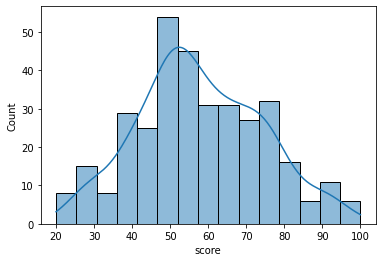

In [ ]:
sns.histplot(data=stud_vital, kde=True)

In [ ]:
# определение границ выбросов в "безнулевой" выборке
q1 = stud_vital.describe()['25%']
q3 = stud_vital.describe()['75%']
iqr = q3 - q1
print("Границы выбросов: [{}, {}].".format(q1 - 1.5*iqr, q3 + 1.5*iqr))

Границы выбросов: [20.0, 100.0].


Очевидно, что без 0 границы выбросов значительно уменьшились. График имеет нормальное распределение.
Предположительно, оценка 0 в датасете соответствует тому, что результат экзамена был аннулирован в силу каких-то причин. Поскольку будущая модель должна предсказывать оценку сдающих экзамен учеников, а не причины их неявки или аннулирования результатов, удалим из датасета все записи с оценкой 0.

In [ ]:
stud = stud.loc[(stud['score'] != 0.0)]

In [ ]:
stud.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 394
Columns: 28 entries, school to score
dtypes: float64(19), int64(1), object(8)
memory usage: 77.9+ KB


## Бинарные категориальные признаки

In [ ]:
for col in ft_binary:
    allocation(col)

,count,unique,top,freq
school,344,2,GP,306


,school
GP,306
MS,38


В столбце 'school' имеется уникальных значений: 2, количество пропусков: 0.


,count,unique,top,freq
sex,344,2,F,178


,sex
F,178
M,166


В столбце 'sex' имеется уникальных значений: 2, количество пропусков: 0.


,count,unique,top,freq
address,331,2,U,260


,address
R,71
U,260


В столбце 'address' имеется уникальных значений: 2, количество пропусков: 13.


,count,unique,top,freq
family_size,320,2,GT3,222


,family_size
GT3,222
LE3,98


В столбце 'family_size' имеется уникальных значений: 2, количество пропусков: 24.


,count,mean,std,min,25%,50%,75%,max
school_support,336.0,0.860119,0.347381,0.0,1.0,1.0,1.0,1.0


,school_support
0.0,47
1.0,289


В столбце 'school_support' имеется уникальных значений: 2, количество пропусков: 8.


,count,mean,std,min,25%,50%,75%,max
family_support,309.0,0.378641,0.485835,0.0,0.0,0.0,1.0,1.0


,family_support
0.0,192
1.0,117


В столбце 'family_support' имеется уникальных значений: 2, количество пропусков: 35.


,count,mean,std,min,25%,50%,75%,max
paid,308.0,0.535714,0.499534,0.0,0.0,1.0,1.0,1.0


,paid
0.0,143
1.0,165


В столбце 'paid' имеется уникальных значений: 2, количество пропусков: 36.


,count,mean,std,min,25%,50%,75%,max
activities,332.0,0.490964,0.500673,0.0,0.0,0.0,1.0,1.0


,activities
0.0,169
1.0,163


В столбце 'activities' имеется уникальных значений: 2, количество пропусков: 12.


,count,mean,std,min,25%,50%,75%,max
nursery,332.0,0.192771,0.39507,0.0,0.0,0.0,0.0,1.0


,nursery
0.0,268
1.0,64


В столбце 'nursery' имеется уникальных значений: 2, количество пропусков: 12.


,count,mean,std,min,25%,50%,75%,max
higher,326.0,0.033742,0.180843,0.0,0.0,0.0,0.0,1.0


,higher
0.0,315
1.0,11


В столбце 'higher' имеется уникальных значений: 2, количество пропусков: 18.


,count,mean,std,min,25%,50%,75%,max
internet,315.0,0.146032,0.3537,0.0,0.0,0.0,0.0,1.0


,internet
0.0,269
1.0,46


В столбце 'internet' имеется уникальных значений: 2, количество пропусков: 29.


,count,mean,std,min,25%,50%,75%,max
romantic,315.0,0.68254,0.466229,0.0,0.0,1.0,1.0,1.0


,romantic
0.0,100
1.0,215


В столбце 'romantic' имеется уникальных значений: 2, количество пропусков: 29.


school представляет собой фактически бинарный категориальный признак.
В дальнейшем можно проанализировать распределения оценок на наличие/отсутствие разницы в параметрах распределения оценок по отношению к разным школам (GP или MS).

sex также бинарный категориальный признак, не имеющий пропусков.
В дальнейшем можно использовать для анализа влияния гендерных различий на целевой признак.

address бинарный категориальный признак, имеющий большое количество пропусков.
Необходимо заполнить пропуски. Для выбора значения, которое можно использовать для этого, проверим взаимосвязь настоящего признака с признаком travel_time - время в пути до школы, который, предположительно, должен быть больше для учеников, проживающих за городом.

In [ ]:
display(pd.crosstab(stud.address, stud.travel_time)) 

travel_time,1.0,2.0,3.0,4.0
address,,,,
R,31,21,10,4
U,176,59,7,3


Анализ взаимосвязи данных признаков не даёт однозначного ответа по выбору типа адреса ученика в соотвествии с затраченным временем на дорогу до школы, поэтому принимаем решение заполнить пропуски наиболее часто встречающимся значением.

family_size бинарный категориальный признак, имеющий большое количество пропусков.
Взаимосвязь с другими категориальными признаками не очевидна.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

school_support бинарный категориальный признак, имеющий небольшое количество пропусков.
Взаимосвязь с другими категориальными признаками не очевидна.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

family_support бинарный категориальный признак, имеющий очень большое количество пропусков.
Проведём дополнительную визуализацию для оценки важности признака для модели.

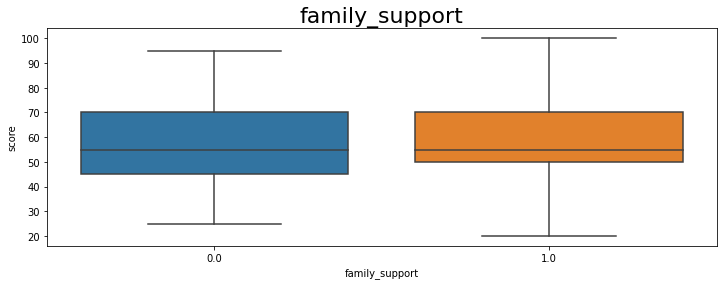

In [ ]:
get_boxplot('family_support')

Влияние признака на целевой признак по классам не выявлено.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

paid бинарный категориальный признак, имеющий большое количество пропусков.
Проведём дополнительную визуализацию для оценки важности признака для модели.

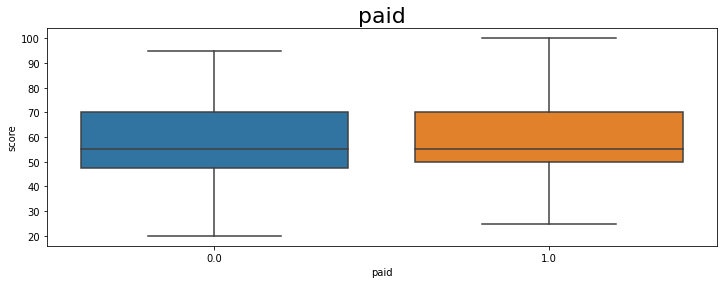

In [ ]:
get_boxplot('paid')

Влияние признака на целевой признак по классам не выявлено.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

activities бинарный категориальный признак, имеющий небольшое количество пропусков.
Взаимосвязь с другими категориальными признаками не очевидна.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

nursery бинарный категориальный признак, имеющий небольшое количество пропусков.
Взаимосвязь с другими категориальными признаками не очевидна.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

higher бинарный категориальный признак, имеющий большое количество пропусков.
Взаимосвязь с другими категориальными признаками не очевидна.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

internet бинарный категориальный признак, имеющий большое количество пропусков.
Взаимосвязь с другими категориальными признаками не очевидна.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

romantic бинарный категориальный признак, имеющий большое количество пропусков.
Взаимосвязь с другими категориальными признаками не очевидна.
Заполнение пропусков будем проводить по наиболее часто встречающимся значениям.

###Заполнение пропущеных значений

**После проведенного анализа** видно, что по всем бинарным категориальным признака необходимо провести заполнение пропущенных значений модой соответствующего признака. Делаем это в цикле:

In [ ]:
for col in ft_binary:
    fill_mode(col)

## Оценочные категориальные признаки

###Анализ и заполнение пропусков

Анализ оценочных категориальных признаков из-за их количества и вариативности неудобно проводить в цикле. В связи с эти, будем использовать ранее определённую функцию для каждого признака по очереди, с последующим решением о их заполнении.

In [ ]:
print(ft_ordinal)

['mother_edu', 'father_edu', 'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time', 'failures', 'family_relations', 'free_time', 'go_out', 'health']


mother_edu
0.0      3
1.0     46
2.0     87
3.0     82
4.0    124
Name: mother_edu, dtype: int64 

В столбце 'mother_edu' имеется 2 пропусков. 




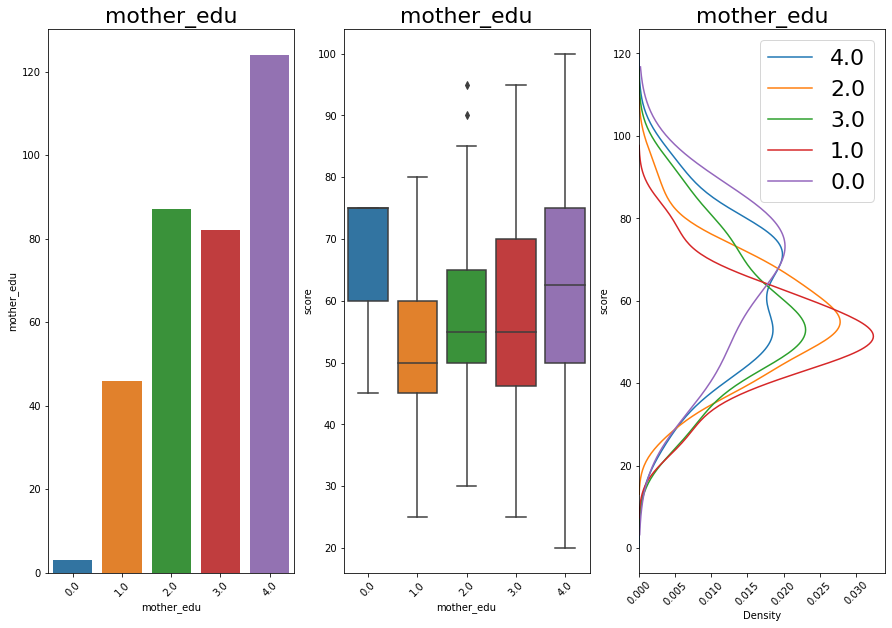

In [ ]:
ordinal_features('mother_edu')

mother_edu - оценочный категориальный признак, имеющий небольшое количество пропусков.
Пропущенные значения заполняем медианой признака.

In [ ]:
stud.mother_edu.fillna(stud.mother_edu.median, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


father_edu
0.0      2
1.0     63
2.0     90
3.0     87
4.0     80
40.0     1
Name: father_edu, dtype: int64 

В столбце 'father_edu' имеется 21 пропусков. 




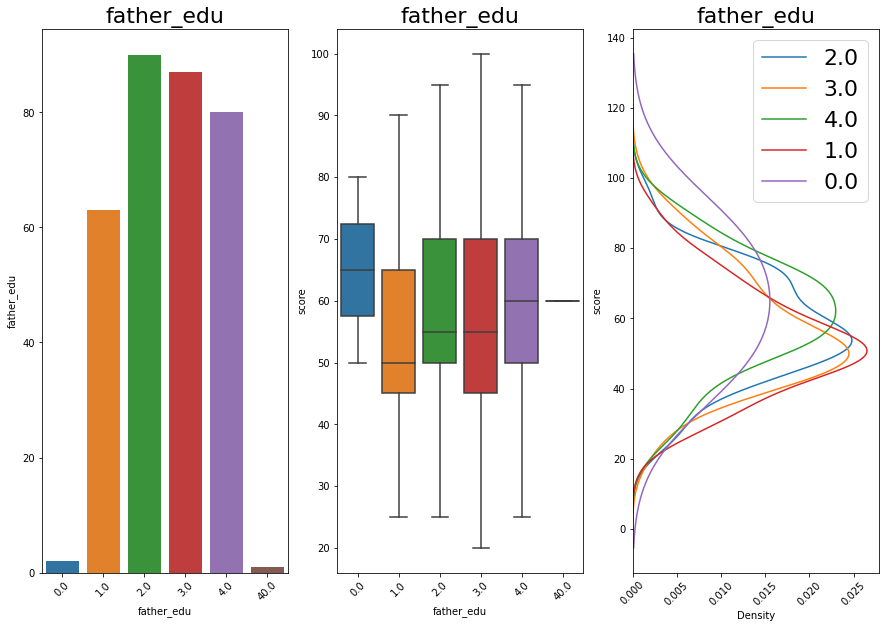

In [ ]:
ordinal_features('father_edu')

father_edu оценочный категориальный признак, имеющий большое количество пропусков.
В столбце есть абсурдное значение - 40, очевидно это ошибка заполнения. Вариант исправления - замена на 4.0.
Остальные пропущенные значения заполняем медианой признака.

In [ ]:
# исправляем ошибку ввода
stud.loc[stud.father_edu == 40.0, 'father_edu'] = 4.0

# заполняем пропуски
stud.father_edu.fillna(stud.father_edu.median(), inplace=True)

mother_job
at_home      49
health       29
other       111
services     87
teacher      51
Name: mother_job, dtype: int64 

В столбце 'mother_job' имеется 17 пропусков. 




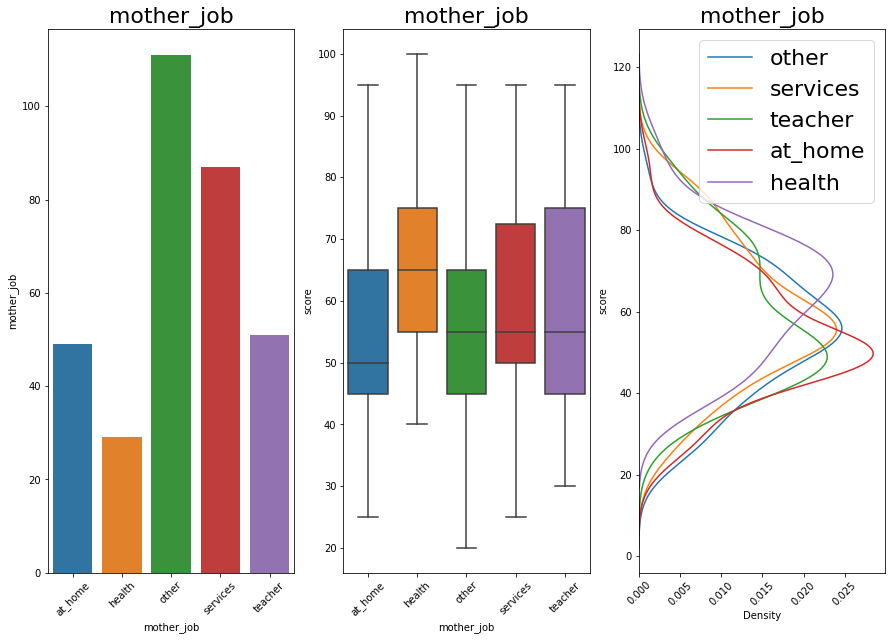

In [ ]:
ordinal_features('mother_job')

mother_job оценочный категориальный признак, имеющий небольшое количество пропусков, без выбросов.
В ситуации полного отсутствия дополнительной информации, пропущенные значения будем заполнять модой признака.

In [ ]:
stud.mother_job.fillna(stud.mother_job.mode()[0], inplace=True)

father_job
at_home      14
health       15
other       172
services     85
teacher      26
Name: father_job, dtype: int64 

В столбце 'father_job' имеется 32 пропусков. 




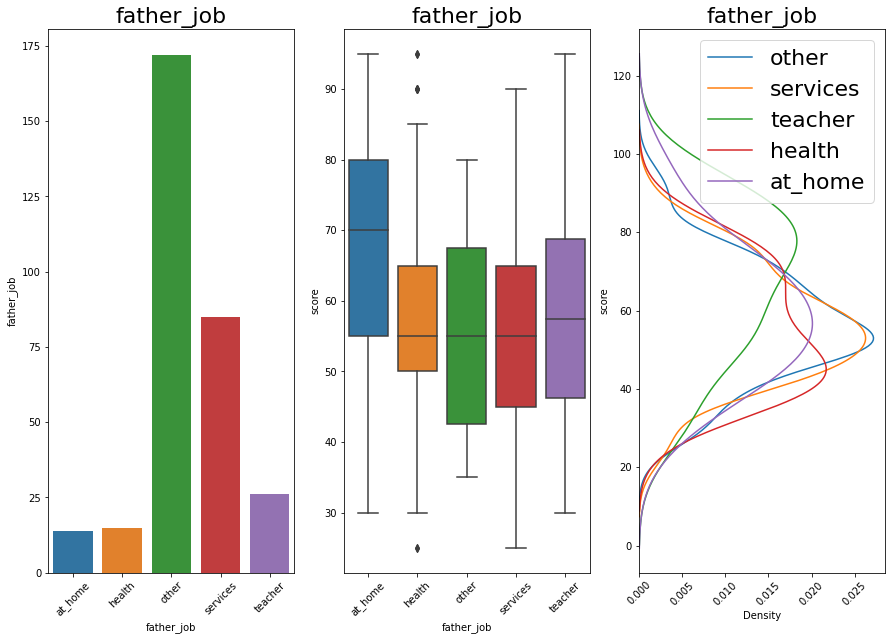

In [ ]:
ordinal_features('father_job')

father_job оценочный категориальный признак, имеющий большое количество пропусков.
В ситуации полного отсутствия дополнительной информации, интерпретировать выбросы по результатам экзаменов, связанных с работой отца, не представляется возможным. Пропущенные значения будем заполнять модой признака.

In [ ]:
stud.father_job.fillna(stud.father_job.mode()[0], inplace=True)

reason
course        115
home           87
other          32
reputation     95
Name: reason, dtype: int64 

В столбце 'reason' имеется 15 пропусков. 




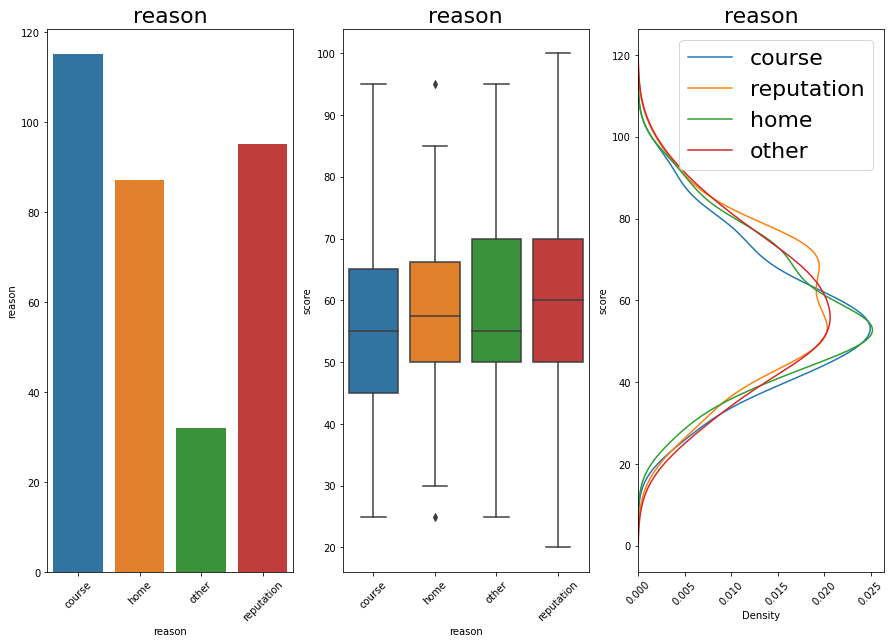

In [ ]:
ordinal_features('reason')

reason оценочный категориальный признак, имеющий небольшое количество пропусков.
Пропущенные значения будем заполнять новым классом признака - unknown.

In [ ]:
stud.reason.fillna('unknown', inplace=True)

guardian
father     78
mother    221
other      19
Name: guardian, dtype: int64 

В столбце 'guardian' имеется 26 пропусков. 




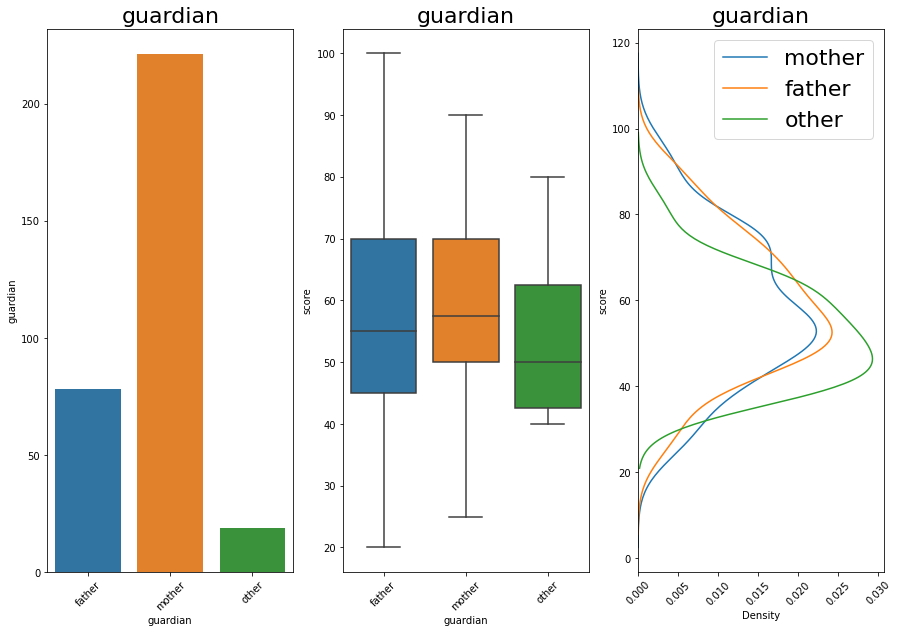

In [ ]:
ordinal_features('guardian')

guardian оценочный категориальный признак, имеющий большое количество пропусков.
Заметно гораздо более сильное влияние на результат экзамена, если опекуном является отец. В этой ситуации представляется неправильным использовать моду признака для заполнения пропусков. В связи с этим, пропущенные значения будем заполнять новым классом признака - unknown.

In [ ]:
stud.guardian.fillna('unknown', inplace=True)

travel_time
1.0    213
2.0     84
3.0     17
4.0      7
Name: travel_time, dtype: int64 

В столбце 'travel_time' имеется 23 пропусков. 




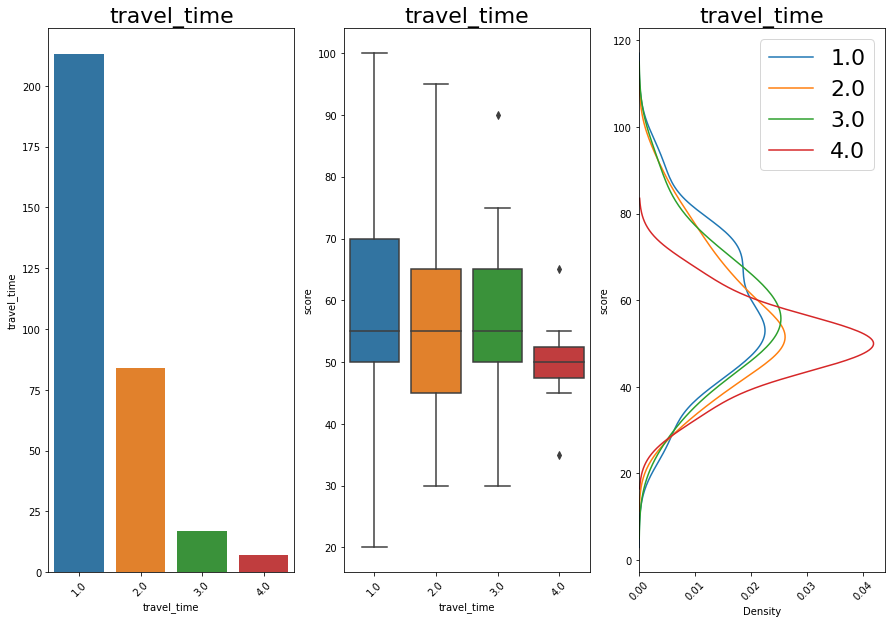

In [ ]:
ordinal_features('travel_time')

travel_time оценочный категориальный признак, имеющий большое количество пропусков.
Ранее признак travel_time анализировался на наличие связи с признаком address. Хотя не было обнаружено заметного влияния на взаимное распределение этих признаков, представляется логичным использовать для заполнения пропущенных значений медиану, сгруппированную по признаку address.

In [ ]:
display(pd.DataFrame(stud.groupby(['address']).travel_time.agg(['count', 'mean', 'median'])))

,count,mean,median
address,,,
R,66,1.803030,2.0
U,255,1.337255,1.0


In [ ]:
# заполнение пропусков одного признака через медиану другого
u_time = stud.groupby('address')['tavel_time'].median().loc['U']
r_time = stud.groupby('address')['tavel_time'].median().loc['R']

for i in stud[stud.trave_time.isna()].index:
  if stud.address.loc[i] == 'U':
    stud.travel_time.loc[i] = u_time
  else:
    stud.travel_time.loc[i] = r_time

study_time
1.0     87
2.0    169
3.0     57
4.0     24
Name: study_time, dtype: int64 

В столбце 'study_time' имеется 7 пропусков. 




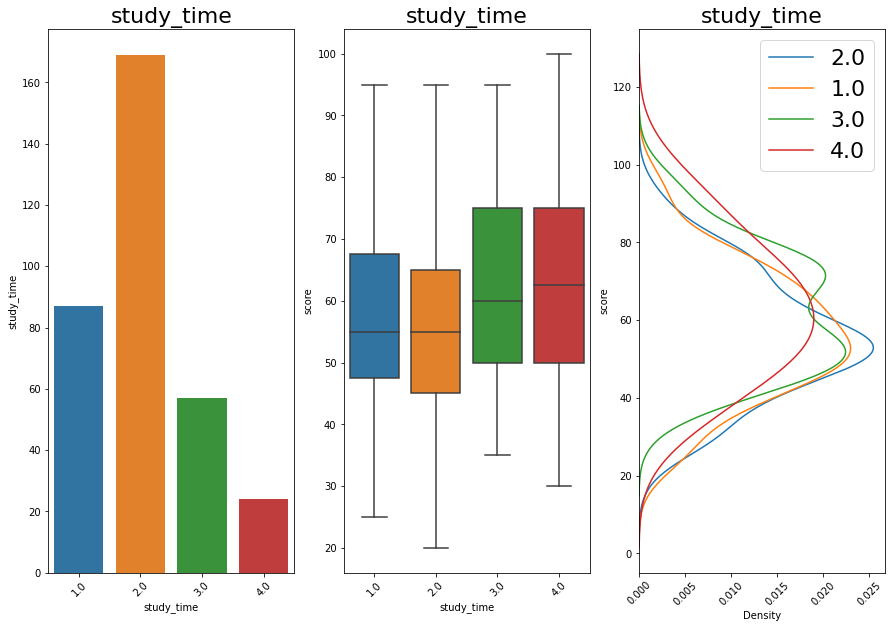

In [ ]:
ordinal_features('study_time')

study_time оценочный категориальный признак, имеющий небольшое количество пропусков.
Заметна более сильное влияние на результат экзамена, если ученик тратит больше времени на учёбу помимо школы. В связи с тем, что количество пропущенных значений невелико, будем заполнять пропуски медианой признака, не проводя дополнительного анализа.

In [ ]:
stud.study_time.fillna(stud.study_time.median(), inplace=True)

failures
0.0    269
1.0     38
2.0      9
3.0      8
Name: failures, dtype: int64 

В столбце 'failures' имеется 20 пропусков. 




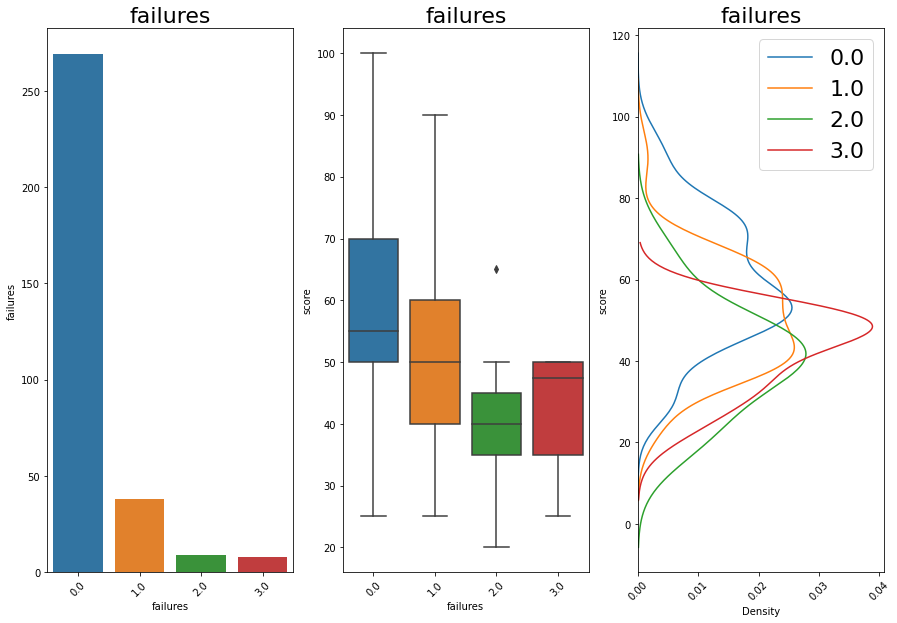

In [ ]:
ordinal_features('failures')

failures оценочный категориальный признак, имеющий большое количество пропусков.
Признак описывает количество внеучебных неудач, причём в методологии (n, если 1<=n<3, иначе 0), по всей видимости, есть существенный недочёт: при количестве неудач более 3 признаку присваивается значение 0. Таким образом в классе "0 неудач" находтся и те ученики, которые не имеют неудач, и те, количество неудач которых более 3. В связи с высоким уровнем неопределённости, а также из-за значительной диспропорции распределения, переведём данный признак из оценочных в бинарные: "есть неудачи" - 1, "нет неудач" - 0. При этом всем пропускам присвоим значения 1.

In [ ]:
stud.failures = stud.failures.apply(lambda x: 1.0 if x!= 0.0 else x)

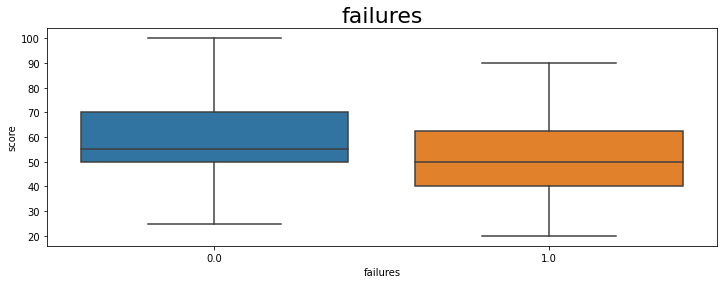

In [ ]:
get_boxplot('failures')

In [ ]:
# изменим списки, содержащие распределение признаков
ft_ordinal.remove('failures')
ft_binary.append('failures')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


family_relations
-1.0      1
 1.0      6
 2.0     14
 3.0     56
 4.0    162
 5.0     82
Name: family_relations, dtype: int64 

В столбце 'family_relations' имеется 23 пропусков. 




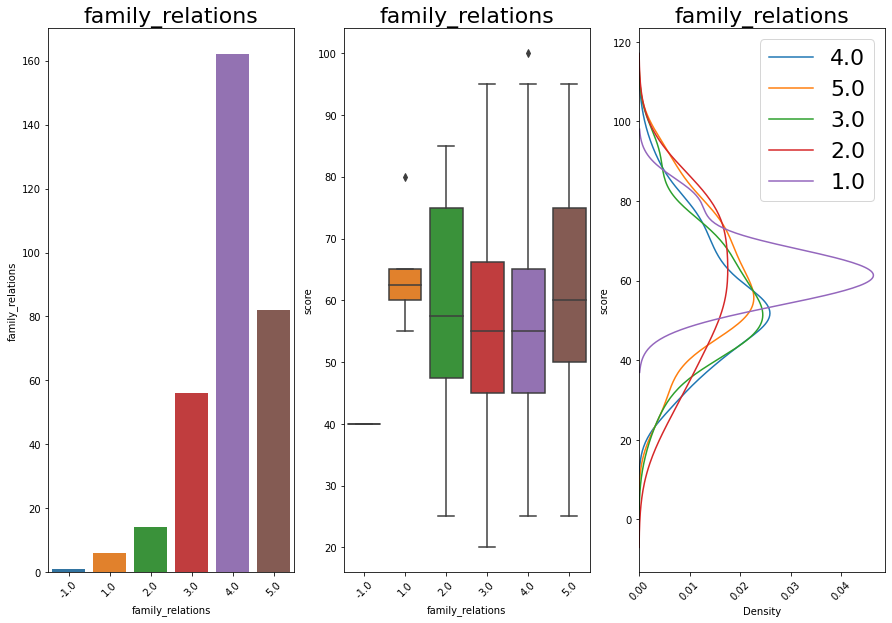

In [ ]:
ordinal_features('family_relations')

family_relations оценочный категориальный признак, имеющий большое количество пропусков.
В столбце есть значение "-1.0", очевидно это ошибка заполнения. Вариант исправления - замена на 1.0.
Остальные пропущенные значения заполняем медианой признака.

In [ ]:
# исправляем ошибку ввода
stud.loc[stud.family_relations == -1.0, 'family_relations'] = 1.0

# заполняем пропуски
stud.family_relations.fillna(stud.family_relations.median(), inplace=True)

free_time
1.0     15
2.0     59
3.0    131
4.0    100
5.0     32
Name: free_time, dtype: int64 

В столбце 'free_time' имеется 7 пропусков. 




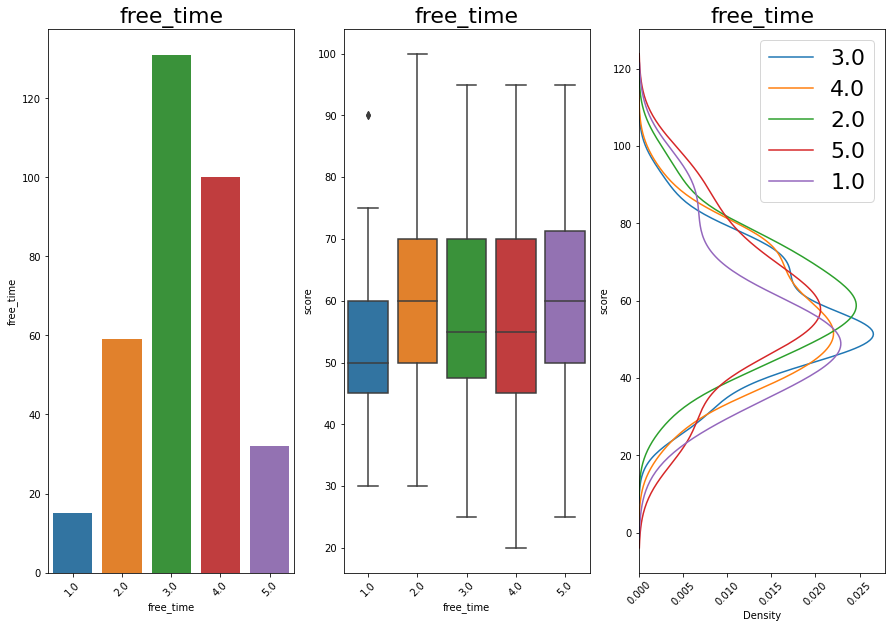

In [ ]:
ordinal_features('free_time')

free_time оценочный категориальный признак, имеющий небольшое количество пропусков.
Удивительно, но не видно сильного влияния на результат экзамена, того факта, что ученик имеет мало или много свободного времени. В связи с этим, будем заполнять пропуски медианой признака, не проводя дополнительного анализа.

In [ ]:
stud.free_time.fillna(stud.free_time.median(), inplace=True)

go_out
1.0     18
2.0     92
3.0    113
4.0     73
5.0     42
Name: go_out, dtype: int64 

В столбце 'go_out' имеется 6 пропусков. 




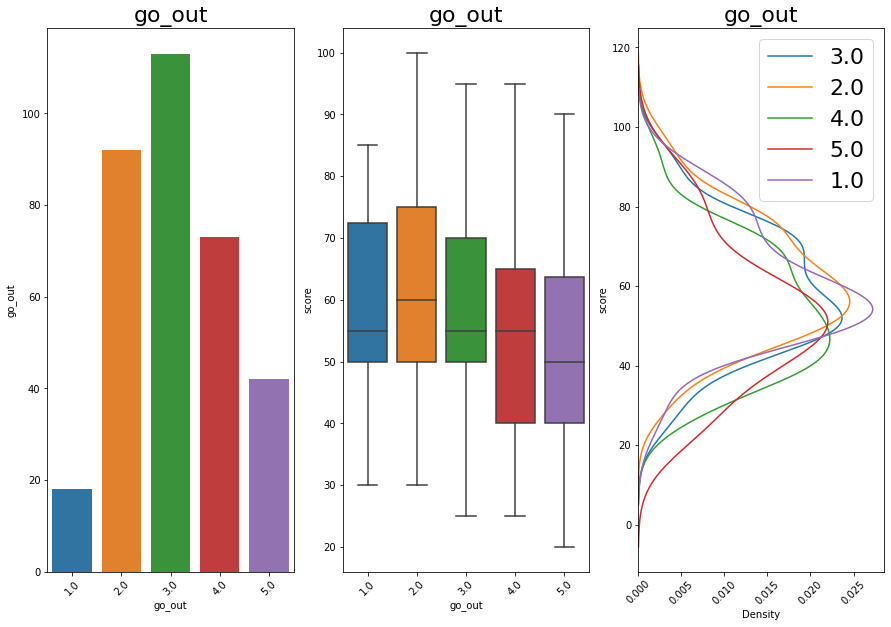

In [ ]:
ordinal_features('go_out')

go_out оценочный категориальный признак, имеющий небольшое количество пропусков.
Удивительно, что ученики не смогли дать оценочный ответ на простой и очевидный вопрос о времени, проведённом с друзьями. Можно предположить, что отсуствие ответа предполагает отсутствие друзей. В связи с этим, будем заполнять пропуски минимальным значением признака.

In [ ]:
stud.go_out.fillna(stud.go_out.min(), inplace=True)

health
1.0     43
2.0     36
3.0     79
4.0     52
5.0    121
Name: health, dtype: int64 

В столбце 'health' имеется 13 пропусков. 




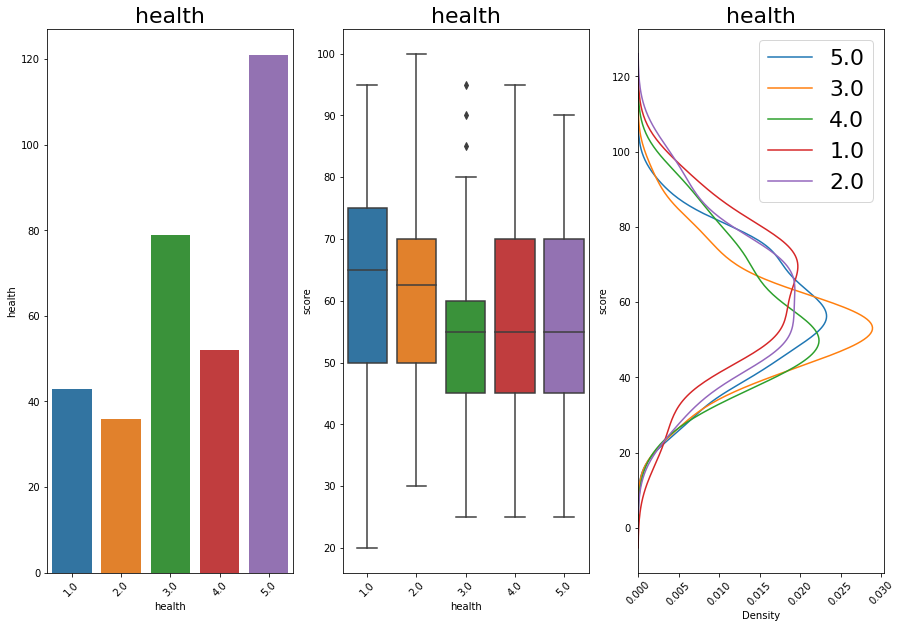

In [ ]:
ordinal_features('health')

health оценочный категориальный признак, имеющий небольшое количество пропусков.
Распределение сильно смещено вправо. Достоверность оценок низка, т.к., по всей видимости, они субъективны. В связи с этим, предположительно, если пропущенные значения заполнить медианой признака, то катострофических изменений не произойдёт.

In [ ]:
stud.health.describe()

count    331.000000
mean       3.519637
std        1.408440
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [ ]:
stud.health.fillna(stud.health.median(), inplace=True)

In [ ]:
# повторно получим краткую информацтю о датасете
stud.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 394
Columns: 28 entries, school to score
dtypes: float64(18), int64(1), object(9)
memory usage: 87.9+ KB


## Построение тепловой карты для визуализации матрицы корреляции

Важно отметить, что при построении матрицы корреляции полностью игнорируются любые нечисловые столбцы. В ходе работы по анализу датасета часть признаков (но не все!) была переведены численный вид. Построение тепловой карты только для части признаков не решает общей задачи, поставленной перед нами, но позволяет попробовать использовать метод, который посылает четкие сообщения об анализируемых данных.

(19.5, -0.5)

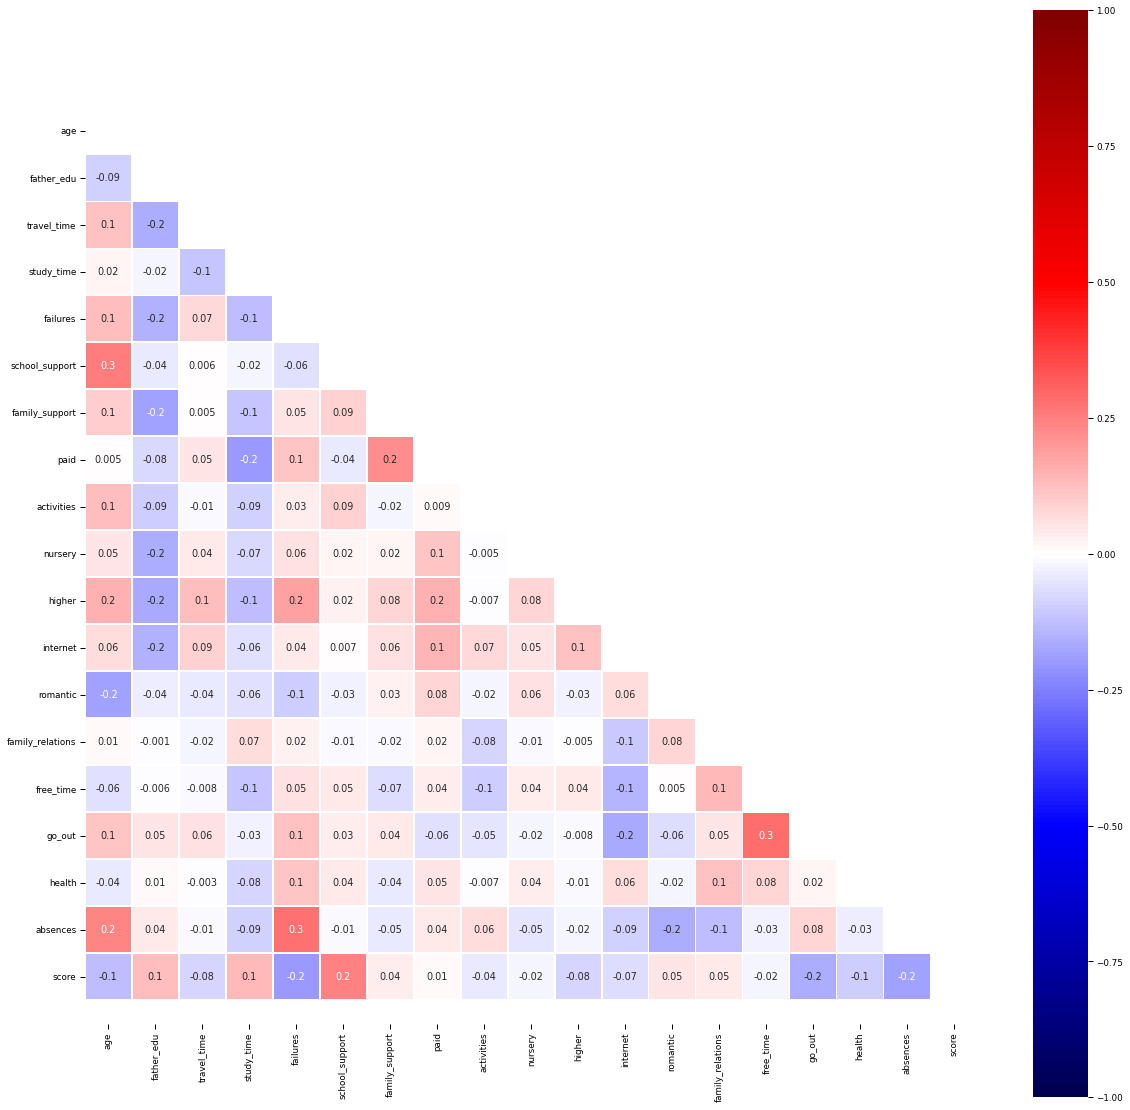

In [ ]:
matrix = np.triu(stud.corr())

fig, ax = plt.subplots(figsize=(20,20))

sns.set_context('paper')
sns.heatmap(stud.corr(), vmin=-1, vmax=1, center=0, cmap='seismic', annot=True, fmt='.1g', linewidths=.5, mask=matrix, square=True)

# исправление отображения heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Тест Стьюдента для всех категориальных признаков

In [ ]:
# создание списка важных факторных признаков для будущей модели
important_for_model = []

for col in ft_categorical:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки father_edu
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки father_job
Найдены статистически значимые различия для колонки study_time
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки school_support
Найдены статистически значимые различия для колонки go_out
Найдены статистически значимые различия для колонки health


In [ ]:
# объединение факторных и численных признаков
important_for_model += ft_numerical

print("Рекомендовано использование {} признаков для построения модели".format(len(important_for_model)))

Рекомендовано использование 14 признаков для построения модели


# Корректировка датасета для будущего создания модели

In [ ]:
stud_math_improv = stud.loc[:, important_for_model]
stud_math_improv.head()

,sex,address,mother_edu,father_edu,mother_job,father_job,study_time,failures,school_support,go_out,health,score,age,absences
0,F,U,4,4.0,at_home,teacher,2.0,0.0,0.0,4.0,3.0,30.0,18,6.0
1,F,U,1,1.0,at_home,other,2.0,0.0,1.0,3.0,3.0,30.0,17,4.0
2,F,U,1,1.0,at_home,other,2.0,1.0,0.0,2.0,3.0,50.0,15,10.0
3,F,U,4,2.0,health,other,3.0,0.0,1.0,2.0,5.0,75.0,15,2.0
4,F,U,3,3.0,other,other,2.0,0.0,1.0,2.0,5.0,50.0,16,4.0


In [ ]:
stud_math_improv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 394
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             344 non-null    object 
 1   address         344 non-null    object 
 2   mother_edu      344 non-null    object 
 3   father_edu      344 non-null    float64
 4   mother_job      344 non-null    object 
 5   father_job      344 non-null    object 
 6   study_time      344 non-null    float64
 7   failures        344 non-null    float64
 8   school_support  344 non-null    float64
 9   go_out          344 non-null    float64
 10  health          344 non-null    float64
 11  score           344 non-null    float64
 12  age             344 non-null    int64  
 13  absences        344 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 50.3+ KB


# Выводы

В результате EDA для анализа влияния признаков датасета на модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы были получены следующие выводы:

В данных достаточно много пустых значений. Только 3 столбца из 30 заполнены полностью, в некоторых доля пропусков доходит до 12% .
Найдены и удалены выбросы: в столбце age (значение возраста старше 19 лет удалены) в столбце score (значение 0.0 удалено).
В данном ноутбуке использованием разные уровни заголовков для возможного создания оглавления при необходимости.
Некоторые гипотезы: отрицательная корреляция признака age может свидетельствовать о том, что чем выше возраст, тем ниже score; отрицательная корреляция признака failures говорит о том, что чем больше неудач по другим предметам тем ниже score; отрицательная корреляция признака go_out и взаимосвязанная положительная корреляция по признаку study_time говорит о том, что чем больше ученик тратит времени на учебу, тем выше score; положительная корреляция по признакам образования родителей говорит о том, что чем выше образование матери и отца тем выше score.
Итоговый датасет, очищенный в ходе предварительного анализа, содержит 344 записи. Соответственно, 51 строка удалена.
Для будущего построения модели предлагается использовать 14 важнейших признаков: 'age', 'sex', 'address', 'mother_edu', 'father_edu', 'mother_job', 'father_job', 'study_time', 'failures', 'school_support', 'go_out', 'health', 'absences', 'score'.